<a href="https://colab.research.google.com/github/Viraj-Rana008/ML-Algorithms/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import seaborn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin

seaborn.set(style='whitegrid')
seaborn.set_context('talk')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
iris_data = load_iris()

In [3]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Text(0.5, 1.0, 'Petal Sample')

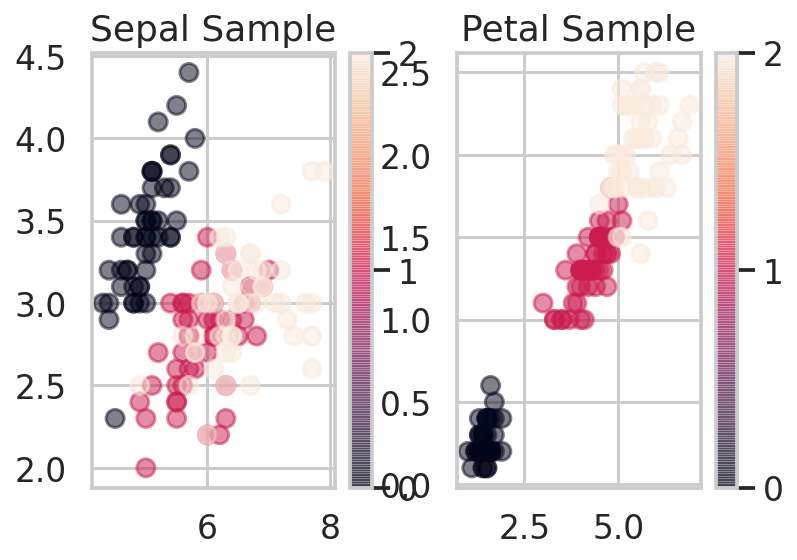

In [4]:
n_samples, n_features = iris_data.data.shape

plt.subplot(1, 2, 1)
scatter_plt_1 = plt.scatter(iris_data.data[:, 0], iris_data.data[:, 1], alpha=0.5, c=iris_data.target)
plt.colorbar(ticks=[0,1,2])
plt.title('Sepal Sample')

plt.subplot(1,2,2)
scatter_plot_2 = plt.scatter(iris_data.data[:, 2], iris_data.data[:, 3], alpha=0.5, c=iris_data.target)
plt.colorbar(ticks=[0, 1, 2])
plt.title('Petal Sample')



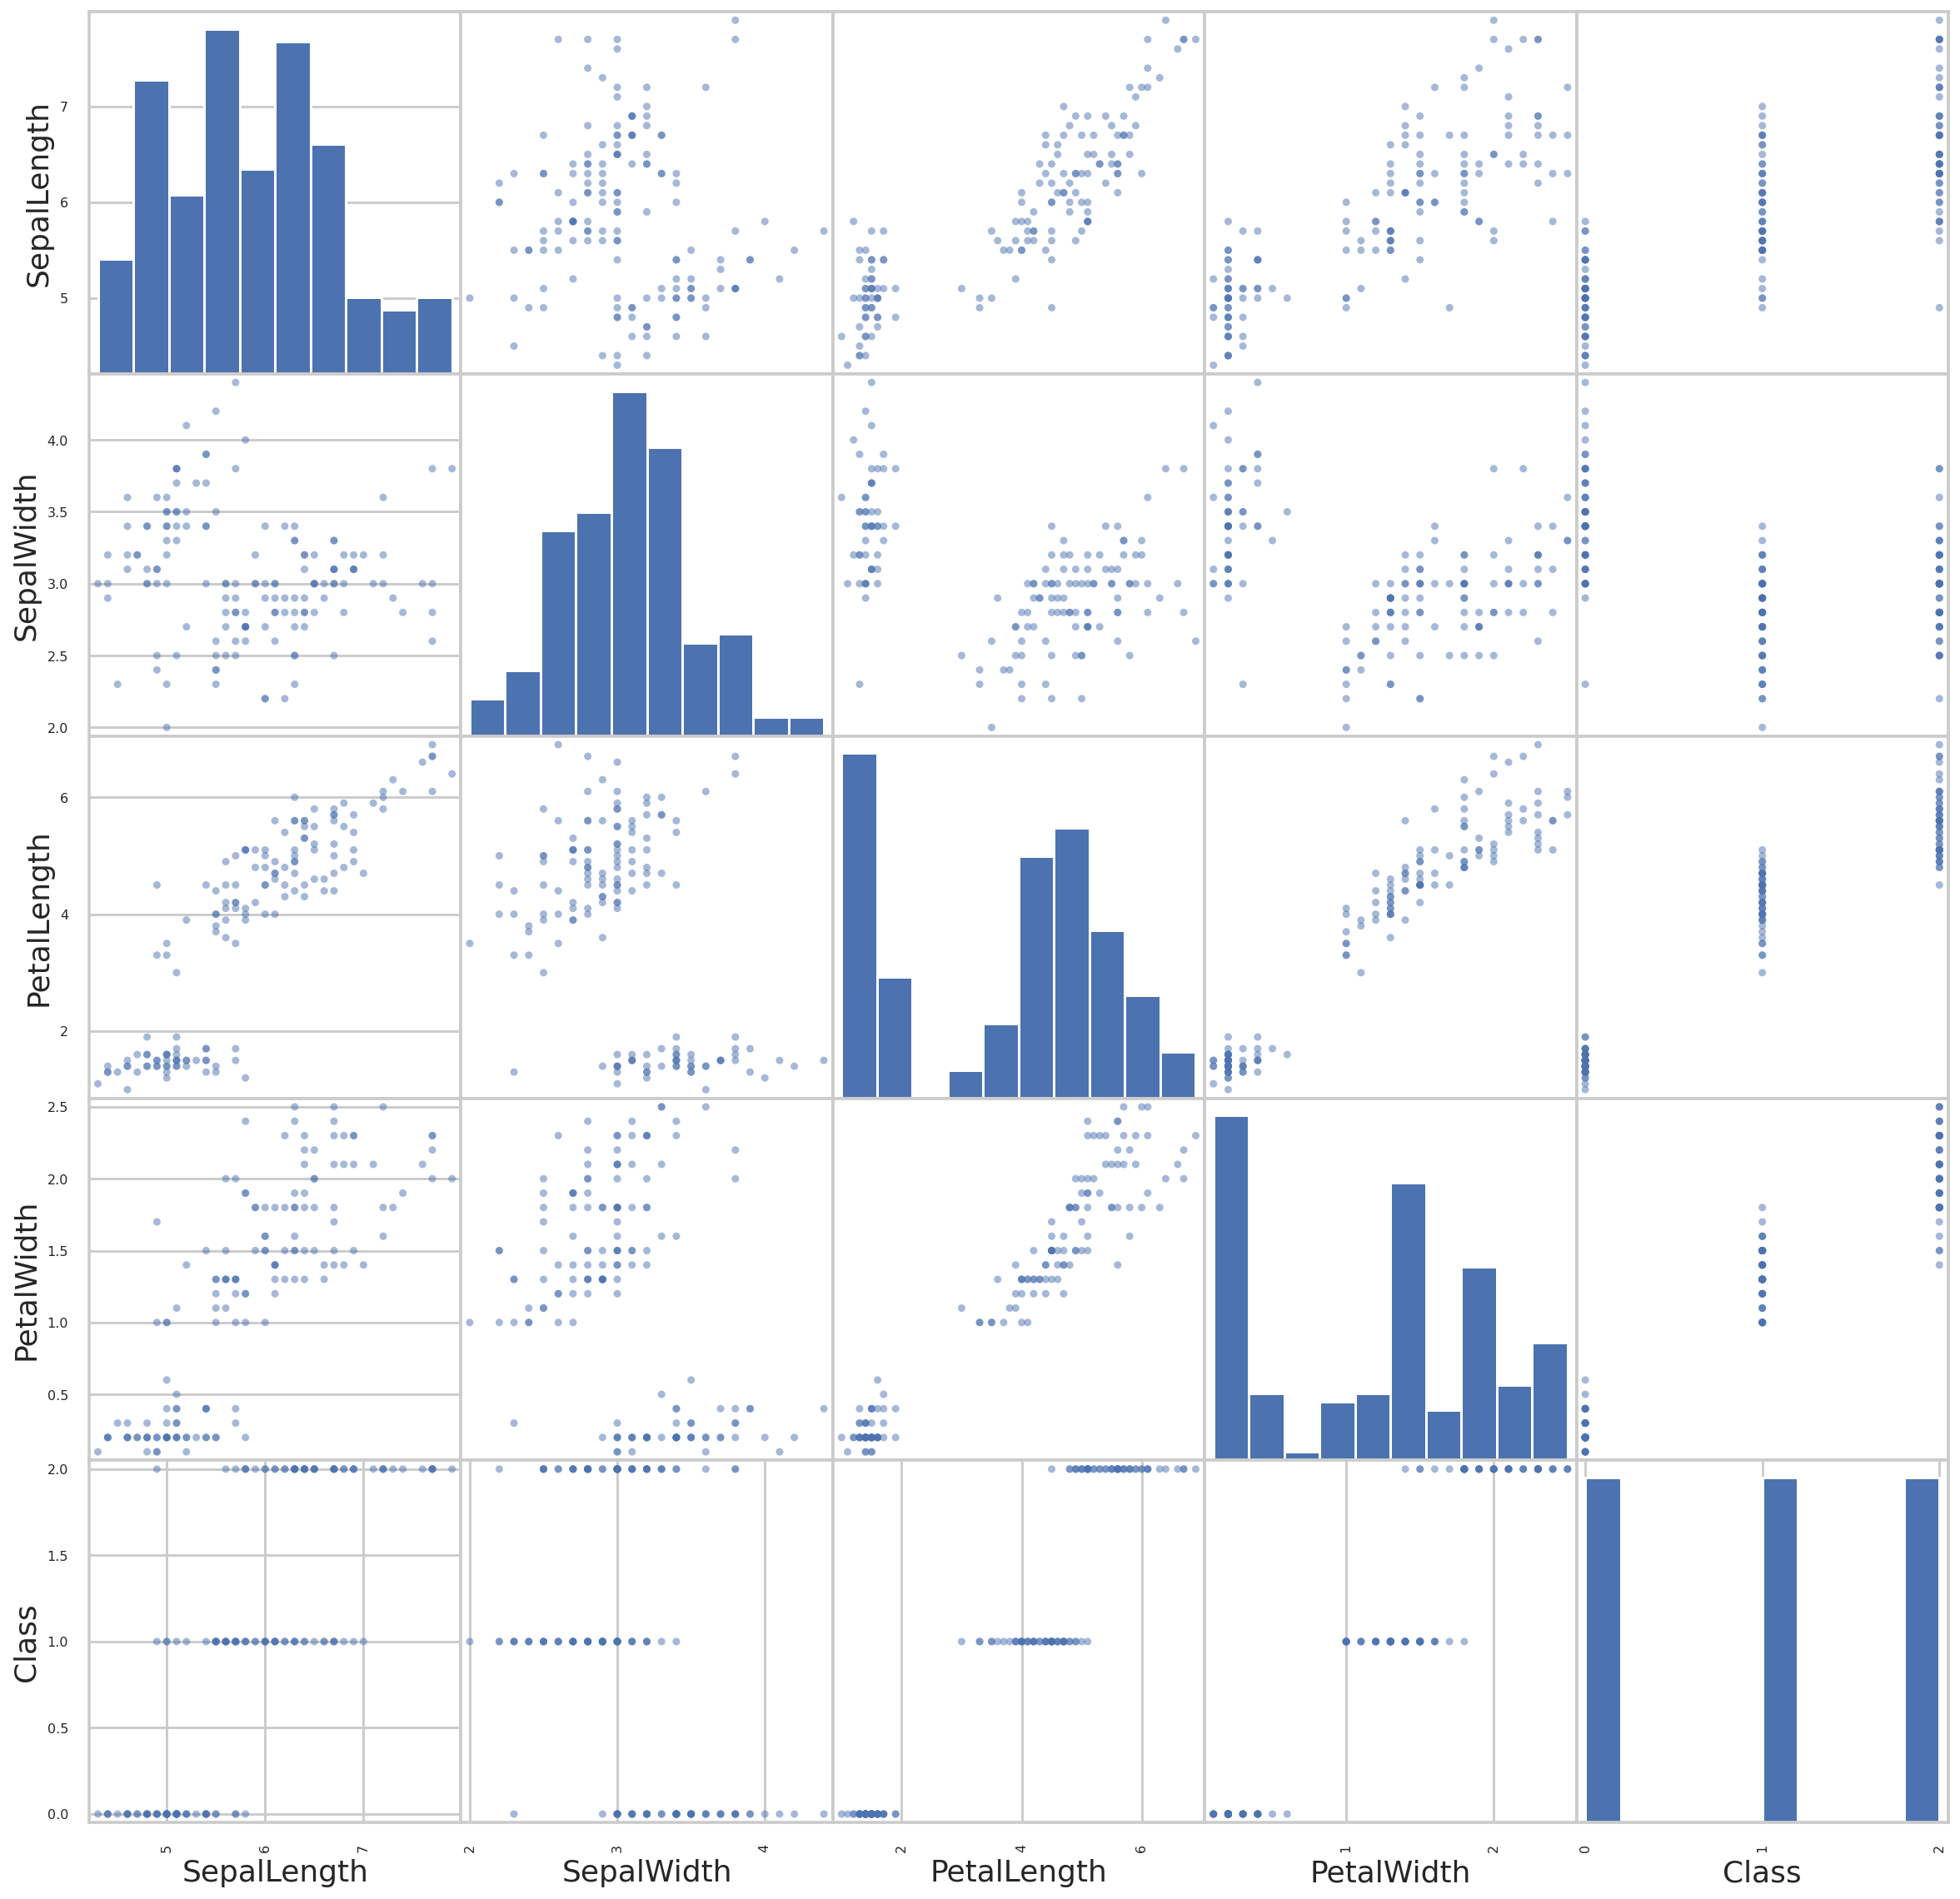

In [5]:
# iris_dataset -> ndarray
iris_dataset = np.column_stack((iris_data.data, iris_data.target.T))      

# dataset -> Dataframe
dataset = pd.DataFrame(iris_dataset, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'])     

scatter_matrix(dataset, alpha=0.5, figsize=(20,20))
plt.show()

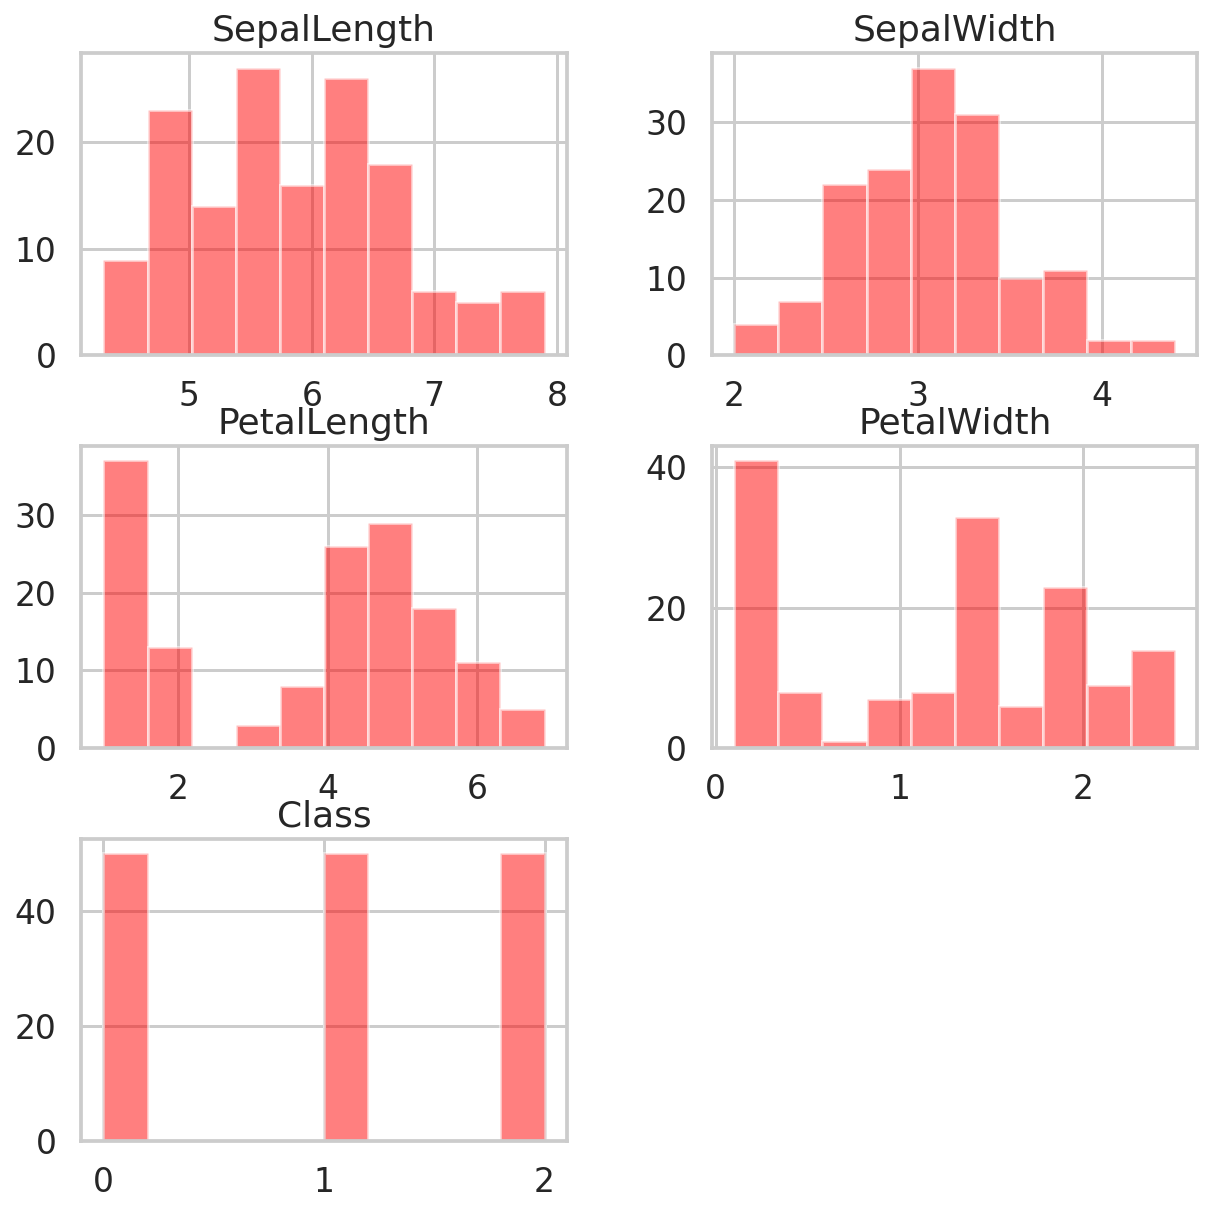

In [ ]:
dataset.hist(alpha=0.5, figsize=(10,10), color='red')
plt.show()

Splitting Data

In [17]:
X = dataset.drop(['Class'], axis=1)
Y = dataset['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

print(type(X_train), type(Y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [34]:
class MultiLayerPerceptron():
  Activ = {
      'sigmoid' : (lambda x: 1/(1 + np.exp(-x))),
      'tanh'    : (lambda x: np.tanh(x)),
      'Relu'    : (lambda x: x*(x>0))
  }
  Deriv = {
      'sigmoid' : (lambda x: x*(1-x)),
      'tanh'    : (lambda x: 1-x**2),
      'Relu'    : (lambda x: x*(x>0))
  }

  def __init__(self, params=None):
    if(params==None):
      self.inputLayer = 4
      self.hiddenLayer = 5
      self.outputLayer = 3
      self.learningRate = 0.005
      self.epochs = 600
      self.biasHiddenValue = -1
      self.biasOutputValue = -1
      self.activation = self.Activ['sigmoid']
      self.deriv = self.Deriv['sigmoid']
    
    else:
      self.inputLayer     = params['InputLayer']
      self.hiddenLayer    = params['HiddenLayer']
      self.outputLayer    = params['OutputLayer']
      self.learningRate   = params['LearningRate']
      self.epochs         = params['Epochs']
      self.biasHiddenValue= params['BiasHiddenValue']
      self.biasOutputValue= params['BiasOutputValue']
      self.activation     = self.Activ[params['ActivationFunction']]
      self.deriv          = self.Deriv[params['ActivationFunction']]
    
    self.weight_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
    self.weight_output = self.starting_weights(self.outputLayer, self.hiddenLayer)
    self.bias_hidden   = np.array([self.biasHiddenValue for i in range(self.hiddenLayer)])
    self.bias_output   = np.array([self.biasOutputValue for i in range(self.outputLayer)])
    self.num_of_classes = 3

  def starting_weights(self, x, y):
    return [[2*random.random() - 1 for i in range(x)] for j in range(y)]

  def BackPropagation_Algorithm(self, x):
    delta_output = []

    # Stage-1 OutputLayer Error
    error_output = self.output - self.output_L2
    delta_output = (-1 * error_output * self.deriv(self.output_L2))
    arrayStore = []

    # Stage-2: Update weights outputlayer and hiddenlayer
    for i in range(self.hiddenLayer):
      for j in range(self.outputLayer):
        self.weight_output[i][j] -= (self.learningRate * delta_output[j] * self.output_L1[i])
        self.bias_output[j] -= (self.learningRate * delta_output[j])

    # Stage-3: HiddenLayer Error
    delta_hidden = np.matmul(self.weight_output, delta_output) * self.deriv(self.output_L1)

    # Stage-4: Update weights HiddenLayer and InputLayer
    for i in range(self.inputLayer):
      for j in range(self.hiddenLayer):
        self.weight_hidden[i][j] -= (self.learningRate * delta_hidden[j] * x[i])
        self.bias_hidden[j] -= (self.learningRate * delta_hidden[j])

  def fit(self, X, Y):
    epoch_count = 1
    total_error = 0
    n = len(X)

    epoch_array = []
    error_array = []

    # W0 = []
    # W1 = []

    while (epoch_count <= self.epochs):
      
      for idx, inputs in enumerate(X):

        self.output = np.zeros(self.num_of_classes)

        # Stage-1: Foreward Propagation
        self.output_L1 = self.activation((np.dot(inputs, self.weight_hidden) + self.bias_hidden.T))
        self.output_L2 = self.activation(np.dot(self.output_L1, self.weight_output) + self.bias_output.T)

        # Stage-2: One-Hot_Encoding
        if Y[idx]==0:
          self.output = np.array([1,0,0])
        elif Y[idx]==1:
          self.output = np.array([0,1,0])
        elif Y[idx]==2:
          self.output = np.array([0,0,1])
        
        square_error = 0
        for i in range(self.outputLayer):
          error = (self.output[i] - self.output_L2[i])**2
          square_error = (0.5 * error)
          total_error = total_error + square_error
        
        # Backpropagation: 
        self.BackPropagation_Algorithm(inputs)
      
      total_error = total_error / n

      if (epoch_count%50==0) or  (epoch_count==1):
        print("Epoch ", epoch_count, "- Total Error: ", square_error)
        error_array.append(square_error)
        epoch_array.append(epoch_count)
      
      #W0.append(self.weight_hidden)
      #W1.append(self.weight_output)

      epoch_count += 1
    
    self.show_err_graph(error_array, epoch_array)

    # plt.plot(W0[0])
    # plt.title('Hidden Weights update during training')
    # plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
    # plt.ylabel('Weight Value')
    # plt.show()

    # plt.plot(W1[0])
    # plt.title('Output Weight update during training')
    # plt.title(['neuron1', 'neuron2', 'neuron3'])
    # plt.ylabel('Weight Value')
    # plt.show()

  
  def show_err_graph(self, error_arr, epoch_arr):
    plt.figure(figsize=(9,4))
    plt.plot(epoch_arr, error_arr, "m-", color="b", marker=11)
    plt.xlabel("Number of Epochs")
    plt.ylabel("Square Error (MSE)")
    plt.title("Error Minimization")
    plt.show()

  def predict(self, X, Y):
    predictions = []

    # Forward Propagation
    forward = np.matmul(X, self.weight_hidden) + self.bias_hidden
    forward = np.matmul(forward, self.output_hidden) + self.bias_output

    for i in forward:
      predictions.append(max(enumerate(i), key=lambda x:x[1])[0])

      array_score = []
      for i in range(len(predictions)):
        if predictions[i]==0:
          array_score.append([i, 'Iris-sestosa', predictions[i], Y[i]])
        elif predictions[i]==1:
          array_score.append([i, 'Iris-versicolor', predictions[i], Y[i]])
        elif predictions[i]==2:
          array_score.append([i, 'Iris-virginica', predictions[i], Y[i]])

      dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'predicted_output', 'desired_output'])
      return predictions, dataframe


Epoch  1 - Total Error:  0.037609349687909015
Epoch  50 - Total Error:  0.06164023672606319
Epoch  100 - Total Error:  0.06160788537667524
Epoch  150 - Total Error:  0.04955807822320321
Epoch  200 - Total Error:  0.025771979761345314
Epoch  250 - Total Error:  0.00738748005930658
Epoch  300 - Total Error:  0.0034791318367217786
Epoch  350 - Total Error:  0.0020598594692003607
Epoch  400 - Total Error:  0.001413054811482616
Epoch  450 - Total Error:  0.001046543492195058
Epoch  500 - Total Error:  0.000806168678241199
Epoch  550 - Total Error:  0.0006385976004597744
Epoch  600 - Total Error:  0.0005074401609311052


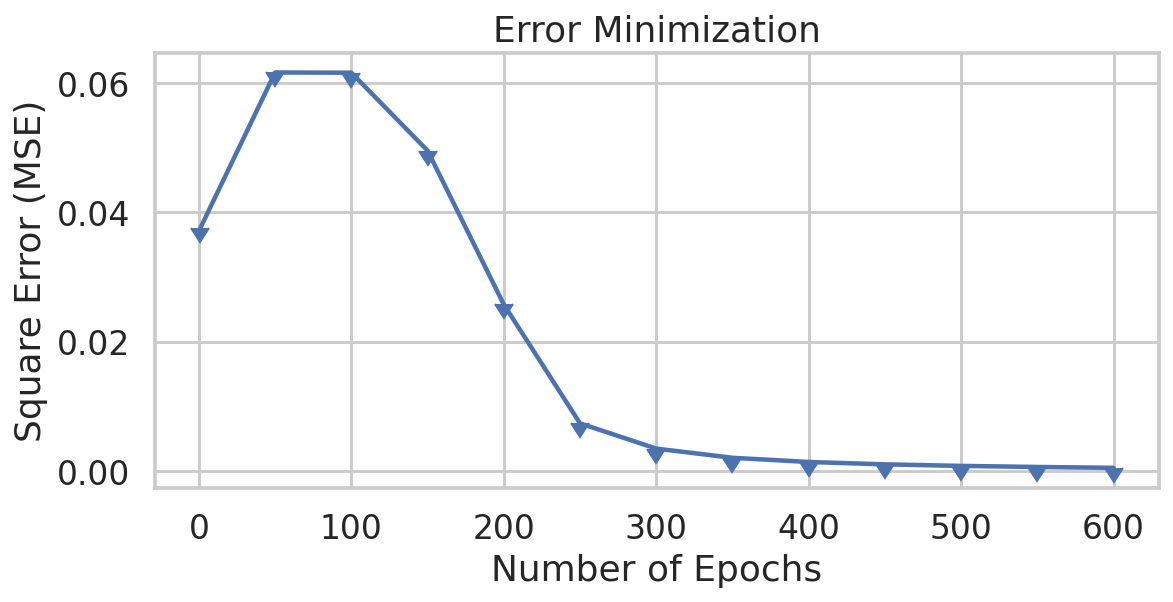

In [35]:
input_param = {}
perc = MultiLayerPerceptron()
perc.fit(X_train, Y_train)